In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [2]:
# Step 1: Load and Explore Dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("First 5 rows of dataset:\n", df.head())
print("\nUnique Classes:", target_names)

First 5 rows of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Unique Classes: ['setosa' 'versicolor' 'virginica']


In [3]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# Step 3: Define KNN from Scratch
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        # Distance calculation (Euclidean)
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        
        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [5]:
# Step 4: Vary k and Check Accuracy
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNN(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.3f}")

k = 1, Accuracy = 0.967
k = 2, Accuracy = 0.967
k = 3, Accuracy = 1.000
k = 4, Accuracy = 1.000
k = 5, Accuracy = 1.000
k = 6, Accuracy = 0.967
k = 7, Accuracy = 0.967
k = 8, Accuracy = 0.967
k = 9, Accuracy = 1.000
k = 10, Accuracy = 1.000
k = 11, Accuracy = 0.967
k = 12, Accuracy = 0.967
k = 13, Accuracy = 0.967
k = 14, Accuracy = 0.967
k = 15, Accuracy = 0.967
k = 16, Accuracy = 0.967
k = 17, Accuracy = 0.967
k = 18, Accuracy = 0.967
k = 19, Accuracy = 0.967
k = 20, Accuracy = 0.933


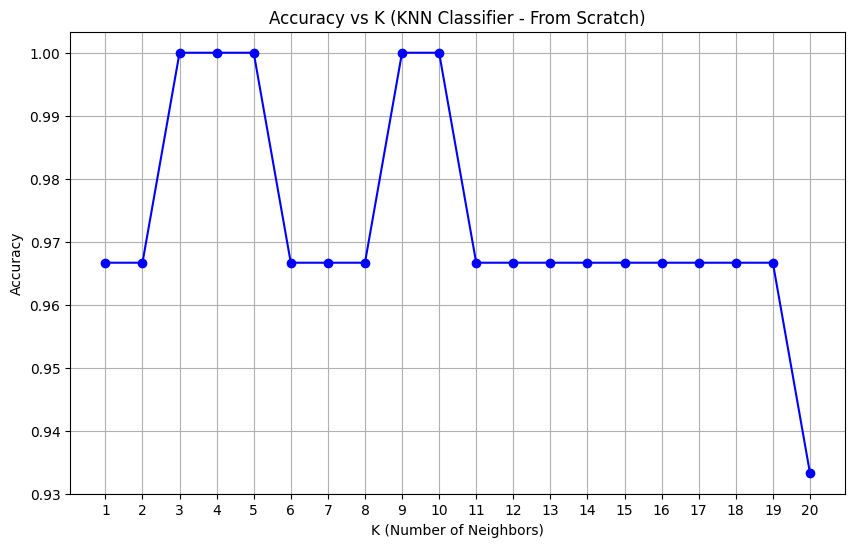

In [6]:
# Step 5: Visualization (Accuracy vs K)
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs K (KNN Classifier - From Scratch)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Best K = 3 with Accuracy = 1.0


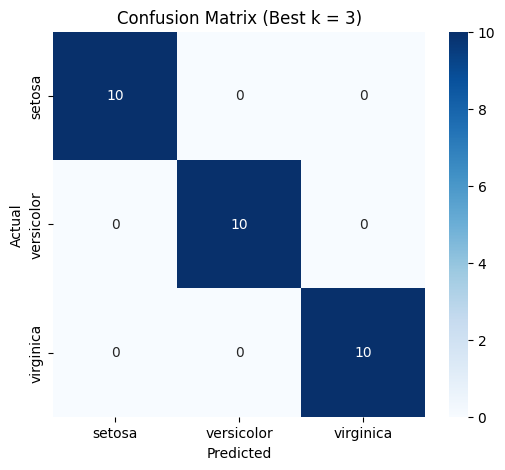

In [7]:
# Step 6: Confusion Matrix for Best K
best_k = k_values[np.argmax(accuracies)]
print("\nBest K =", best_k, "with Accuracy =", max(accuracies))

best_model = KNN(k=best_k)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Confusion Matrix (Best k = {best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
# Step 7: Final Evaluation
print("\nClassification Results with Best K:")
for i in range(len(y_test)):
    print(f"Sample {i+1}: True Label = {target_names[y_test[i]]}, Predicted = {target_names[y_pred_best[i]]}")


Classification Results with Best K:
Sample 1: True Label = setosa, Predicted = setosa
Sample 2: True Label = virginica, Predicted = virginica
Sample 3: True Label = versicolor, Predicted = versicolor
Sample 4: True Label = versicolor, Predicted = versicolor
Sample 5: True Label = setosa, Predicted = setosa
Sample 6: True Label = versicolor, Predicted = versicolor
Sample 7: True Label = setosa, Predicted = setosa
Sample 8: True Label = setosa, Predicted = setosa
Sample 9: True Label = virginica, Predicted = virginica
Sample 10: True Label = versicolor, Predicted = versicolor
Sample 11: True Label = virginica, Predicted = virginica
Sample 12: True Label = virginica, Predicted = virginica
Sample 13: True Label = virginica, Predicted = virginica
Sample 14: True Label = versicolor, Predicted = versicolor
Sample 15: True Label = setosa, Predicted = setosa
Sample 16: True Label = setosa, Predicted = setosa
Sample 17: True Label = setosa, Predicted = setosa
Sample 18: True Label = versicolor,